# Notebook 05: Exploratory Data Analysis of Speakers

**Project: Data Triage of Transcribed Nixon Tapes** <br>
*Michelle Ballard and April Crompton* <br>
Loyola University Maryland Data Science Project 

## Import statements

In [31]:
import pickle
import pandas as pd
from collections import Counter, defaultdict

import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.dates
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

from wordcloud import WordCloud 

In [2]:
# unpickle preserved dataframes to continue EDA and Statistical Analysis
pkl_file = open('cleaned_combined.pkl', 'rb')

df_all_combined = pickle.load(pkl_file)

df_speakers_combined = pickle.load(pkl_file)
print(df_speakers_combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34847 entries, 0 to 34846
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   corpus                 34847 non-null  object         
 1   exhibit                34847 non-null  object         
 2   speaker_clean          34847 non-null  object         
 3   nonspeech_clean        34847 non-null  object         
 4   speech_final           34847 non-null  object         
 5   speech_final_expanded  34847 non-null  object         
 6   location               34847 non-null  object         
 7   date                   34847 non-null  datetime64[ns] 
 8   start_dtime            34847 non-null  datetime64[ns] 
 9   end_dtime              34847 non-null  datetime64[ns] 
 10  time_diff              34847 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), object(7), timedelta64[ns](1)
memory usage: 3.2+ MB
None


In [3]:
# set font size for figures
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# ref Pedro M Duarte https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

## Explore Time

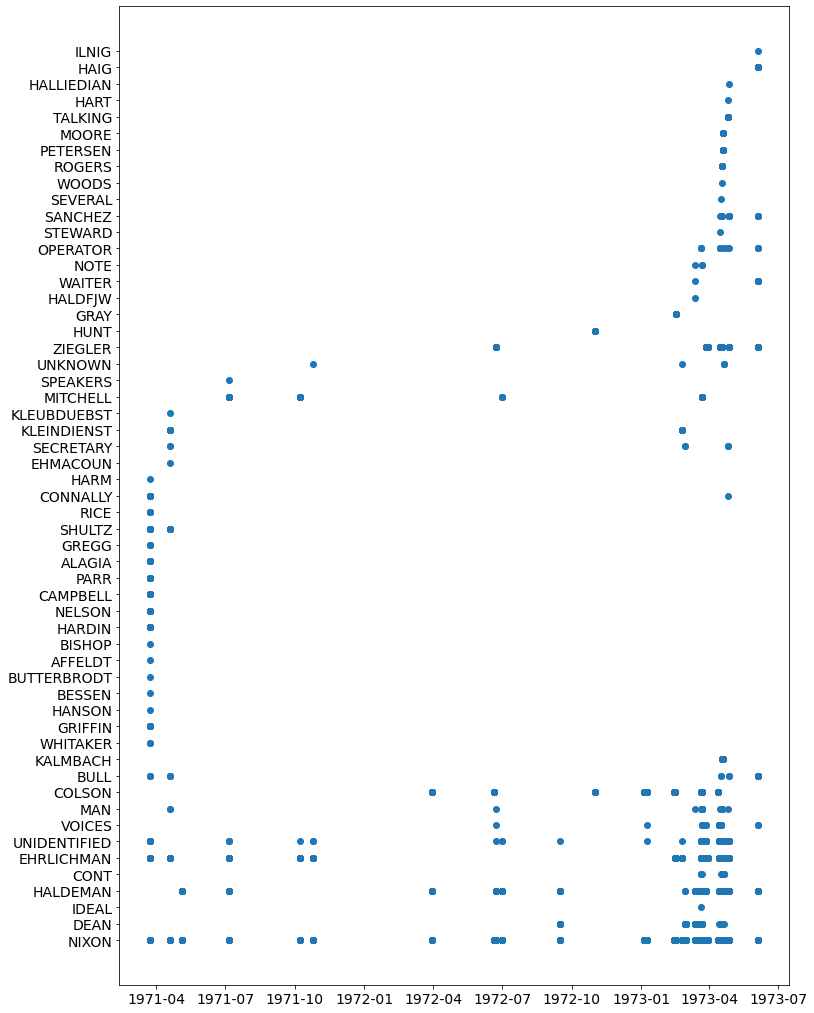

In [4]:
x_values = df_speakers_combined['start_dtime']
y_values = df_speakers_combined['speaker_clean']
plt.figure(figsize=(12, 18))
dates = matplotlib.dates.date2num(x_values)

matplotlib.pyplot.plot_date(dates, y_values);

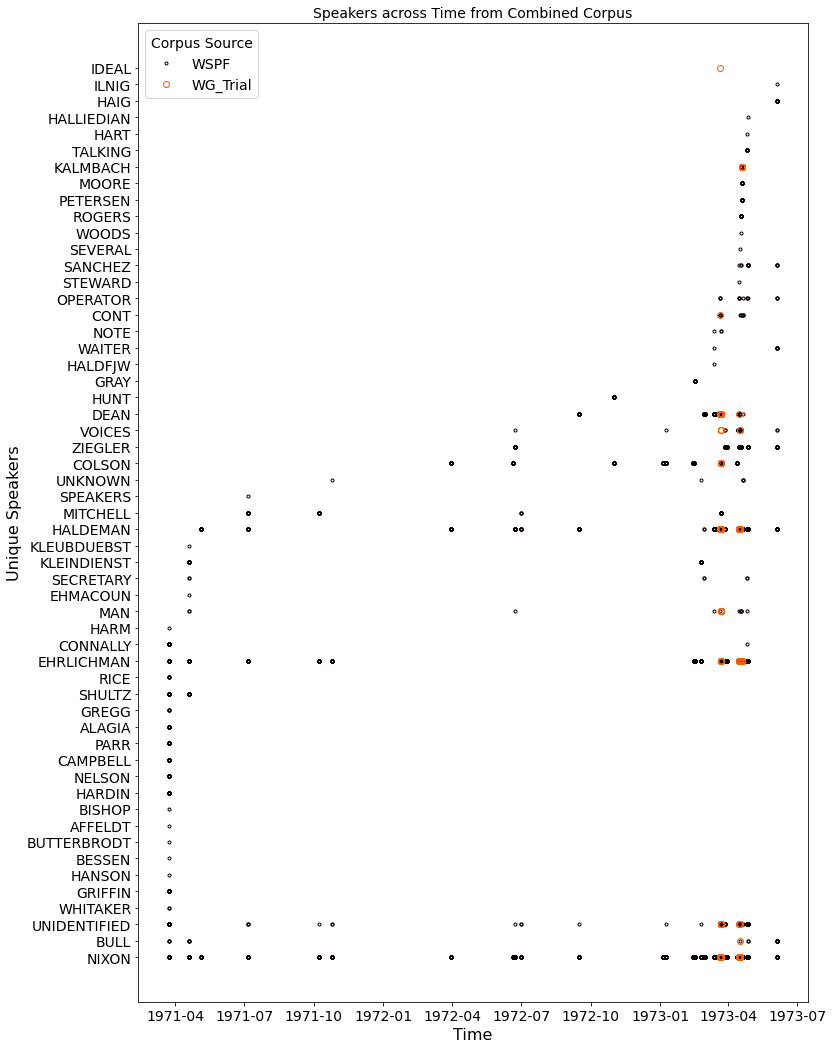

In [7]:
plt.figure(figsize=(12, 18))
dates = matplotlib.dates.date2num(x_values)

# Get unique names
uniq = sorted(list(set(df_speakers_combined['corpus'])), reverse=True)

# Set the color map to match the number
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
mark = ['.','o']

# Plot each
for i in range(len(uniq)):
    indx = df_speakers_combined['corpus'] == uniq[i]
    plt.plot_date(x_values[indx], y_values[indx], 
                  color=scalarMap.to_rgba(i), label=uniq[i], fmt=mark[i], fillstyle='none')

plt.xlabel('Time')
plt.ylabel('Unique Speakers')
plt.title('Speakers across Time from Combined Corpus')
plt.legend(loc='upper left', title = "Corpus Source")
plt.show();

## Explore Locations

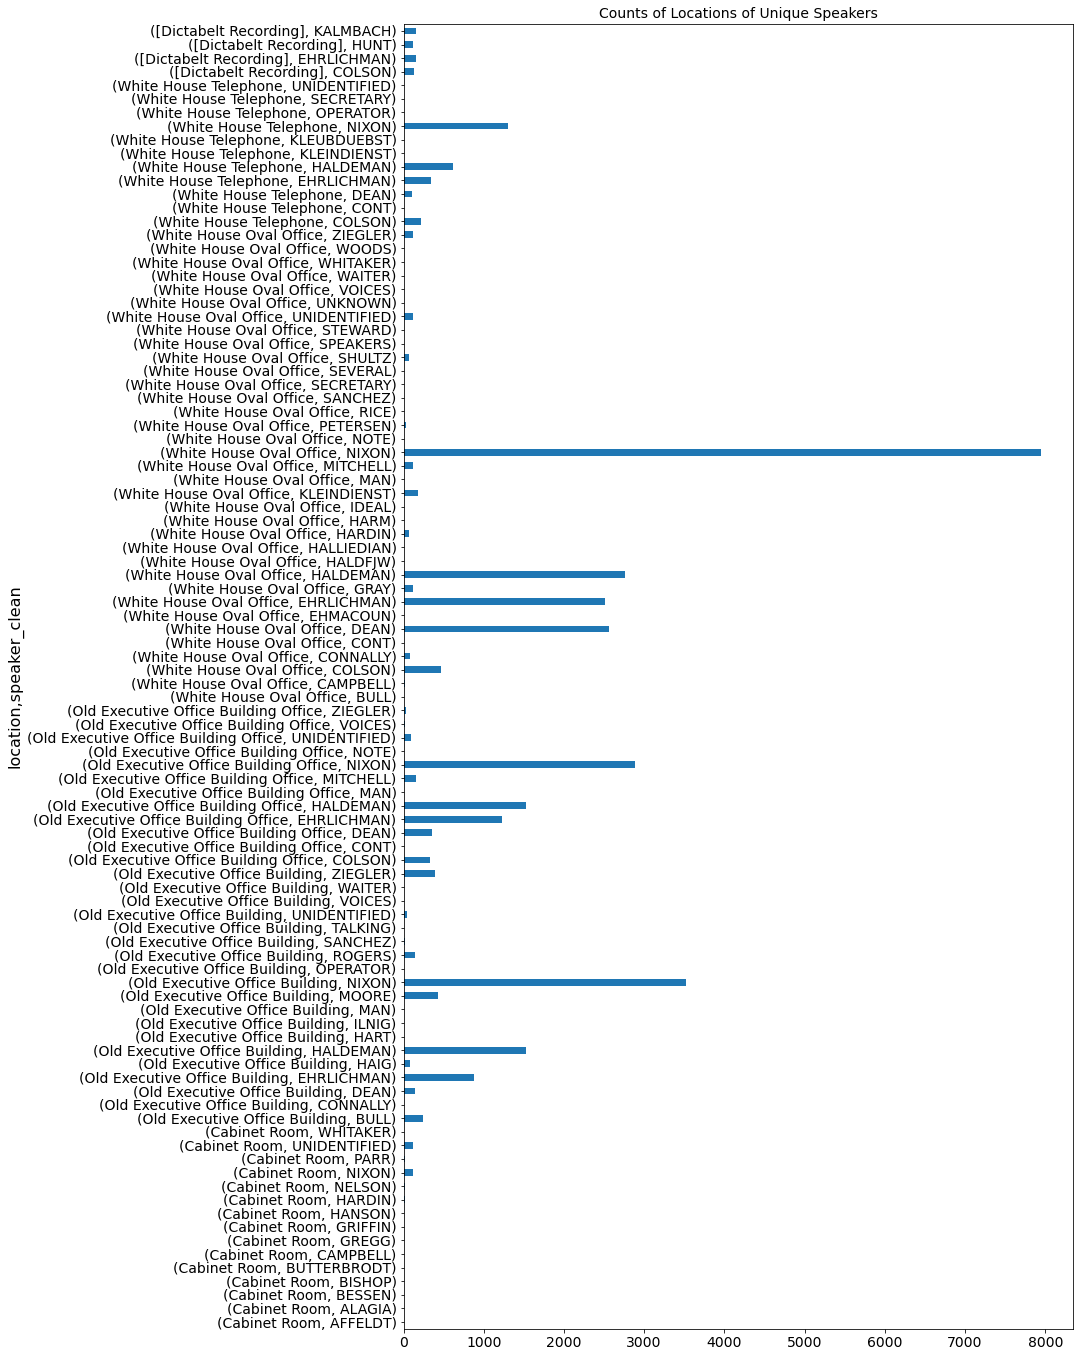

In [13]:
# examining the frequency of locations present in data
plt.figure(figsize=(12, 24))
locations = df_speakers_combined.groupby(["location", "speaker_clean"])["exhibit"].count()
plt.title('Counts of Locations of Unique Speakers')
locations.plot.barh();

## Explore frequent terms

In [14]:
# combine all speech per speaker
df_speakers_collapsed = df_speakers_combined.groupby(['speaker_clean'])['speech_final'].apply(lambda x: ','.join(x)).reset_index()
df_speakers_collapsed = df_speakers_collapsed.set_index('speaker_clean')

In [15]:
# count character length per speaker
df_speakers_collapsed['speech_length'] = df_speakers_collapsed['speech_final'].str.len()

# keep speakers with more than 500 characters
df_speakers_collapsed_small = df_speakers_collapsed.drop(df_speakers_collapsed[df_speakers_collapsed.speech_length < 500].index)
df_speakers_collapsed_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, ALAGIA to ZIEGLER
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   speech_final   29 non-null     object
 1   speech_length  29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 696.0+ bytes


In [16]:
# Create a document-term matrix per speaker using CountVectorizer, removing stop words
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_speakers_collapsed_small.speech_final)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = df_speakers_collapsed_small.index
data_dtm

,00,000,01,02,05,08,0h,0l,10,100,...,zealots,zeigler,zero,zeroed,zieg1er,ziegler,zielger,zingers,zone,zoning
speaker_clean,,,,,,,,,,,,,,,,,,,,,
ALAGIA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BULL,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,10,0,0,0,0
CAMPBELL,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
COLSON,0,0,0,14,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
CONNALLY,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CONT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEAN,0,2,1,0,0,0,0,0,4,0,...,0,0,0,0,0,5,0,0,0,0
EHRLICHMAN,11,3,0,0,9,4,0,1,12,0,...,0,0,1,0,0,27,1,0,0,2
GRAY,0,0,0,0,0,8,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data = data_dtm.transpose()

In [18]:
# Find the top 15 words per speaker
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(15)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ALAGIA': [('uh', 26),
  ('going', 8),
  ('dairymen', 3),
  ('satisfied', 2),
  ('president', 2),
  ('judgment', 2),
  ('think', 2),
  ('pounds', 2),
  ('mr', 2),
  ('southeast', 2),
  ('support', 1),
  ('conscious', 1),
  ('mississippi', 1),
  ('million', 1),
  ('approximately', 1)],
 'BULL': [('sir', 101),
  ('yes', 56),
  ('uh', 47),
  ('right', 23),
  ('march', 22),
  ('just', 21),
  ('ll', 16),
  ('dean', 15),
  ('president', 15),
  ('calls', 12),
  ('telephone', 12),
  ('moore', 12),
  ('meeting', 10),
  ('ziegler', 10),
  ('don', 9)],
 'CAMPBELL': [('uh', 13),
  ('dollars', 11),
  ('think', 7),
  ('don', 6),
  ('just', 6),
  ('billion', 6),
  ('winter', 6),
  ('cents', 5),
  ('real', 5),
  ('milk', 5),
  ('pounds', 5),
  ('mr', 5),
  ('turnaround', 5),
  ('cows', 5),
  ('president', 5)],
 'COLSON': [('uh', 361),
  ('know', 150),
  ('think', 136),
  ('don', 119),
  ('yeah', 115),
  ('ah', 109),
  ('said', 93),
  ('just', 90),
  ('ve', 84),
  ('right', 75),
  ('thing', 74),
  ('l

In [19]:
# Print the top 15 words said by each speaker
for speaker, top_words in top_dict.items():
    print(speaker)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ALAGIA
uh, going, dairymen, satisfied, president, judgment, think, pounds, mr, southeast, support, conscious, mississippi, million
---
BULL
sir, yes, uh, right, march, just, ll, dean, president, calls, telephone, moore, meeting, ziegler
---
CAMPBELL
uh, dollars, think, don, just, billion, winter, cents, real, milk, pounds, mr, turnaround, cows
---
COLSON
uh, know, think, don, yeah, ah, said, just, ve, right, thing, ll, oh, 30
---
CONNALLY
uh, going, think, don, year, ve, just, somebody, sir, got, ll, cost, know, price
---
CONT
don, said, thing, dean, right, gotta, got, hang, liability, lawyers, talked, talk, problem, house
---
DEAN
uh, right, know, think, going, said, just, don, ve, thing, got, ll, people, say
---
EHRLICHMAN
uh, think, yeah, said, know, dean, don, right, say, just, thing, going, got, ll
---
GRAY
uh, right, think, mr, president, sure, ve, like, know, yes, oh, 16, 1973, thing
---
GREGG
uh, president, mr, want, preserve, heritage, said, farmstead, help, live, life, invest

### Explore the effect of customizing stop words

In [20]:
# Look at the most common top words --> add them to the stop word list

# Pull out the top 30 words for each speaker
words = []
for speaker in data.columns:
    top = [word for (word, count) in top_dict[speaker]]
    for t in top:
        words.append(t)
        
words

['uh',
 'going',
 'dairymen',
 'satisfied',
 'president',
 'judgment',
 'think',
 'pounds',
 'mr',
 'southeast',
 'support',
 'conscious',
 'mississippi',
 'million',
 'approximately',
 'sir',
 'yes',
 'uh',
 'right',
 'march',
 'just',
 'll',
 'dean',
 'president',
 'calls',
 'telephone',
 'moore',
 'meeting',
 'ziegler',
 'don',
 'uh',
 'dollars',
 'think',
 'don',
 'just',
 'billion',
 'winter',
 'cents',
 'real',
 'milk',
 'pounds',
 'mr',
 'turnaround',
 'cows',
 'president',
 'uh',
 'know',
 'think',
 'don',
 'yeah',
 'ah',
 'said',
 'just',
 've',
 'right',
 'thing',
 'll',
 'oh',
 '30',
 'president',
 'uh',
 'going',
 'think',
 'don',
 'year',
 've',
 'just',
 'somebody',
 'sir',
 'got',
 'll',
 'cost',
 'know',
 'price',
 'wilbur',
 'don',
 'said',
 'thing',
 'dean',
 'right',
 'gotta',
 'got',
 'hang',
 'liability',
 'lawyers',
 'talked',
 'talk',
 'problem',
 'house',
 'god',
 'uh',
 'right',
 'know',
 'think',
 'going',
 'said',
 'just',
 'don',
 've',
 'thing',
 'got',
 'l

In [21]:
# Aggregate this list and identify the most common words along with how many transcripts they occur in
Counter(words).most_common()

[('uh', 26),
 ('think', 20),
 ('right', 19),
 ('just', 19),
 ('don', 18),
 ('know', 18),
 ('president', 14),
 ('yeah', 14),
 ('ve', 14),
 ('got', 13),
 ('yes', 12),
 ('said', 12),
 ('thing', 12),
 ('ll', 11),
 ('say', 10),
 ('going', 9),
 ('mr', 9),
 ('sir', 9),
 ('dean', 7),
 ('want', 5),
 ('time', 4),
 ('milk', 3),
 ('price', 3),
 ('talked', 3),
 ('people', 3),
 ('good', 3),
 ('did', 3),
 ('pounds', 2),
 ('support', 2),
 ('march', 2),
 ('dollars', 2),
 ('cows', 2),
 ('oh', 2),
 ('30', 2),
 ('year', 2),
 ('way', 2),
 ('sure', 2),
 ('help', 2),
 ('dairy', 2),
 ('farmers', 2),
 ('talking', 2),
 ('exactly', 2),
 ('really', 2),
 ('john', 2),
 ('wanted', 2),
 ('mean', 2),
 ('position', 2),
 ('committee', 2),
 ('stuff', 2),
 ('dairymen', 1),
 ('satisfied', 1),
 ('judgment', 1),
 ('southeast', 1),
 ('conscious', 1),
 ('mississippi', 1),
 ('million', 1),
 ('approximately', 1),
 ('calls', 1),
 ('telephone', 1),
 ('moore', 1),
 ('meeting', 1),
 ('ziegler', 1),
 ('billion', 1),
 ('winter', 1),
 

In [34]:
# If more than half of the speakers have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count >= 9]
add_stop_words

['uh',
 'think',
 'right',
 'just',
 'don',
 'know',
 'president',
 'yeah',
 've',
 'got',
 'yes',
 'said',
 'thing',
 'll',
 'say',
 'going',
 'mr',
 'sir']

In [35]:
# Update the document-term matrix with the new list of stop words

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_speakers_collapsed_small.speech_final)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = df_speakers_collapsed_small.index

In [36]:
# List of speakers who said more than stop words
full_names = data_stop.index.to_list()
data_stop.index.to_list()

['ALAGIA',
 'BULL',
 'CAMPBELL',
 'COLSON',
 'CONNALLY',
 'CONT',
 'DEAN',
 'EHRLICHMAN',
 'GRAY',
 'GREGG',
 'GRIFFIN',
 'HAIG',
 'HALDEMAN',
 'HARDIN',
 'HUNT',
 'KALMBACH',
 'KLEINDIENST',
 'MAN',
 'MITCHELL',
 'MOORE',
 'NELSON',
 'NIXON',
 'PARR',
 'PETERSEN',
 'ROGERS',
 'SHULTZ',
 'UNIDENTIFIED',
 'VOICES',
 'ZIEGLER']

In [37]:
data_stop = data_stop.transpose()

In [38]:
# Find the number of unique words that each speaker uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for speaker in data_stop.columns:
    uniques = data_stop[speaker].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

In [39]:
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['speaker', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,speaker,unique_words
27,VOICES,20
0,ALAGIA,41
9,GREGG,55
23,PETERSEN,63
17,MAN,68
10,GRIFFIN,100
22,PARR,103
5,CONT,109
15,KALMBACH,139
2,CAMPBELL,156


### Visualize frequent terms

In [40]:
# Make word clouds
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

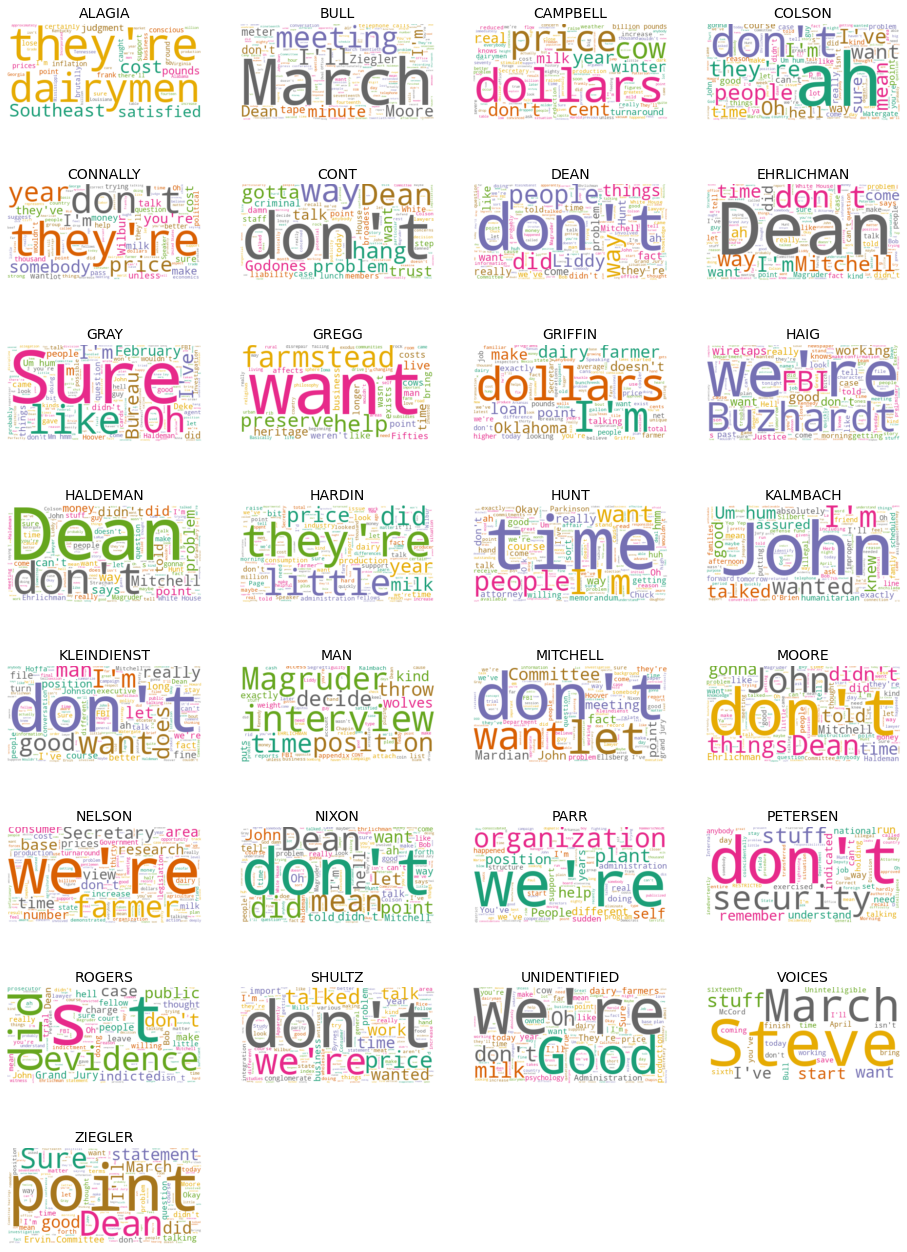

In [41]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 32]

# Create subplots for each comedian
for index, speaker in enumerate(data_stop.columns):
    wc.generate(df_speakers_collapsed_small.speech_final[speaker])
    
    plt.subplot(11, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

# stop words will need to be more aggressive to cleanse noise

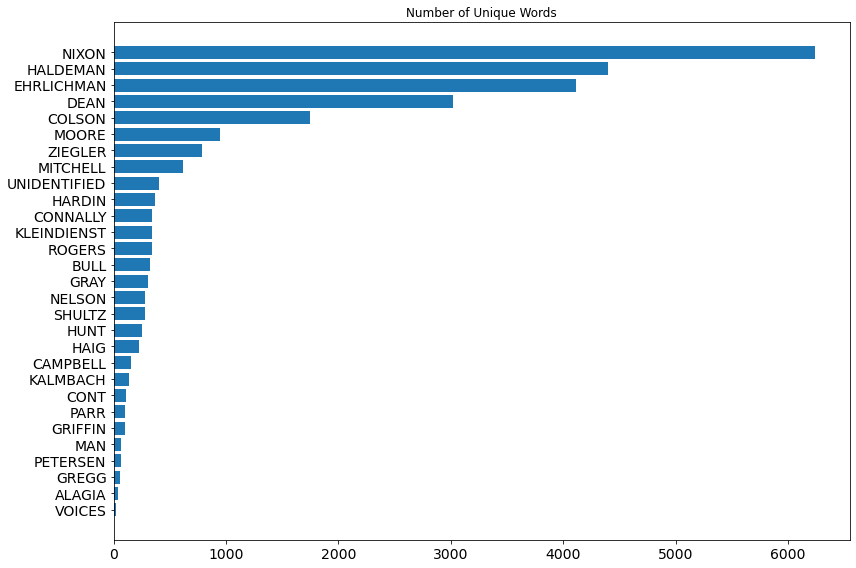

In [42]:
# Plot unique terms per speaker

y_pos = np.arange(len(data_words))
plt.rcParams['figure.figsize'] = [12, 8]

plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.speaker)
plt.title('Number of Unique Words', fontsize=12)
plt.tight_layout()
plt.show()